In [52]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error  # 루트 제곱 평균 오차
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
file_url = "https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv"
data = pd.read_csv(file_url)
data.shape

(889, 9)

In [16]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


In [18]:
round(data.describe(),2)

,Pclass,Age,SibSp,Parch,Survived
count,889.00,889.00,889.00,889.00,889.00
mean,2.31,29.32,0.52,0.38,0.38
std,0.83,12.98,1.10,0.81,0.49
min,1.00,0.42,0.00,0.00,0.00
25%,2.00,22.00,0.00,0.00,0.00
50%,3.00,28.00,0.00,0.00,0.00
75%,3.00,35.00,1.00,0.00,1.00
max,3.00,80.00,8.00,6.00,1.00


In [8]:
data.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Embarked',
       'Survived'],
      dtype='object')

In [13]:
data.corr(numeric_only=True)

,Pclass,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.336512,0.081656,0.016824,-0.335549
Age,-0.336512,1.000000,-0.232543,-0.171485,-0.069822
SibSp,0.081656,-0.232543,1.000000,0.414542,-0.034040
Parch,0.016824,-0.171485,0.414542,1.000000,0.083151
Survived,-0.335549,-0.069822,-0.034040,0.083151,1.000000


<Axes: >

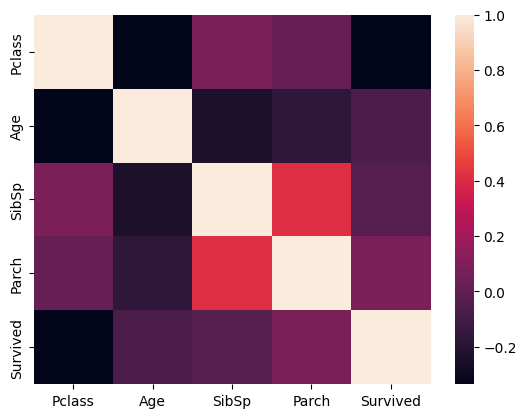

In [20]:
sns.heatmap(data.corr(numeric_only=True))

<Axes: >

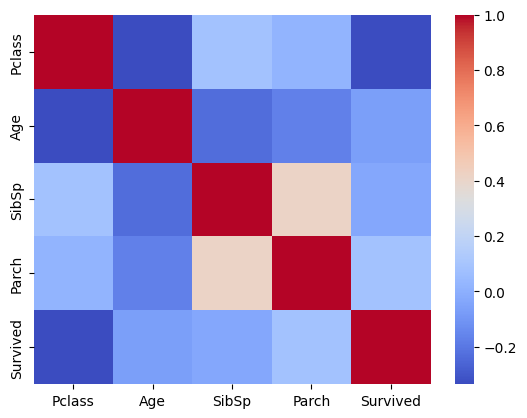

In [21]:
sns.heatmap(data.corr(numeric_only=True),cmap="coolwarm")

<Axes: >

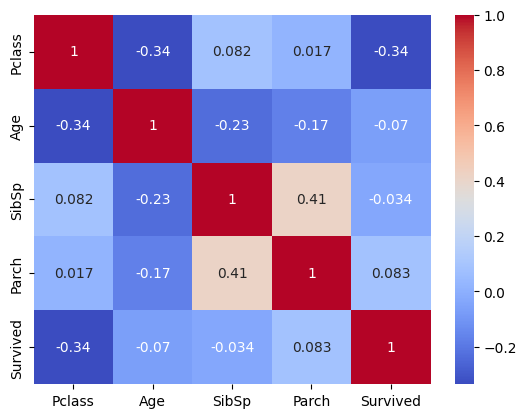

In [27]:
sns.heatmap(data.corr(numeric_only=True), cmap="coolwarm",annot=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


## 전처리 : 카테고리 변수를 숫자 변환 (1. 더미변수로 변환 2. 원핫인코딩)

In [31]:
data.Name.nunique()

889

In [35]:
data.Sex.nunique()

2

In [36]:
data.Ticket.nunique()

680

In [38]:
data.Embarked.nunique()

3

In [39]:
data = data.drop({"Name","Ticket"},axis=1)
data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


In [40]:
# 더미 변수 방법
pd.get_dummies(data,columns=["Sex","Embarked"])


,Pclass,Age,SibSp,Parch,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,False,True,False,False,True
1,1,38.0,1,0,1,True,False,True,False,False
2,3,26.0,0,0,1,True,False,False,False,True
3,1,35.0,1,0,1,True,False,False,False,True
4,3,35.0,0,0,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,False,True,False,False,True
885,1,19.0,0,0,1,True,False,False,False,True
886,3,28.0,1,2,0,True,False,False,False,True
887,1,26.0,0,0,1,False,True,True,False,False


In [42]:
data = pd.get_dummies(data, columns=["Sex", "Embarked"],drop_first=True)
data.head()

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,True,False,True
1,1,38.0,1,0,1,False,False,False
2,3,26.0,0,0,1,False,False,True
3,1,35.0,1,0,1,False,False,True
4,3,35.0,0,0,0,True,False,True


In [48]:
X = data.drop("Survived",axis=1)
y = data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=100)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(711, 7) (178, 7)
(711,) (178,)


In [50]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [51]:
y_pred = model.predict(X_test)

In [54]:
# model test
accuracy_score(y_pred,y_test)

0.7808988764044944

In [55]:
model.coef_

array([[-1.18227458, -0.03992344, -0.32130907,  0.00798257, -2.56867969,
        -0.07881136, -0.23558772]])

In [56]:
model.intercept_

array([5.27045281])

In [57]:
pd.Series(model.coef_[0],index=X.columns)

Pclass       -1.182275
Age          -0.039923
SibSp        -0.321309
Parch         0.007983
Sex_male     -2.568680
Embarked_Q   -0.078811
Embarked_S   -0.235588
dtype: float64

# 파생 변수 : 피쳐 엔지니어링

In [61]:
data['Familly'] = data["SibSp"]+data["Parch"]
data = data.drop(["SibSp","Parch"],axis=1)

In [62]:
data.head()

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S,Familly
0,3,22.0,0,True,False,True,1
1,1,38.0,1,False,False,False,1
2,3,26.0,1,False,False,True,0
3,1,35.0,1,False,False,True,1
4,3,35.0,0,True,False,True,0


In [63]:
X = data.drop("Survived", axis=1)
y = data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100
)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(711, 6) (178, 6)
(711,) (178,)


In [64]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [65]:
y_pred = model.predict(X_test)
# model test
accuracy_score(y_pred, y_test)

0.7921348314606742